In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KernelDensity

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})


In [2]:
# Construye (y grafica) espectros a partir de los coeficientes (coeff) que se le den como argumento,
# el tipo de objeto (se ingresa una columan del dataframe objetos[tipo de objeto]) y el corrimiento al rojo (z)
def construir_espectro(coeff,objeto,z):
    evecs = objeto["evecs"]
    spec_mean = objeto["spec_mean"]
    wavelengths = 10**logwave/(1+z)
    
    fig = plt.figure(figsize=(6, 2))
    fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)
    
    plt.plot(wavelengths, spec_mean + np.dot(coeff[:n_components], evecs[:n_components]), '-k')
    plt.ylim(-10, 25)
    plt.ylabel('flujo')
    plt.xlabel(r'Longitud de onda${\rm (\AA)}$')
    plt.show()    

# Carga las distribuciones (kernel distribition estimation) de los coeficientes de PCA de
# algún tipo de objeto dependiendo de la distribución que se le de como argumento
def loadKdes(dist):
    kdes = []
    for i in range(n_components):
        margen = (dist[i].max()-dist[i].min())/4
        kde = KernelDensity(bandwidth=margen/8, kernel='gaussian')
        kde.fit(dist[i][:, None])
        kdes.append(kde)
    return kdes

# Genera espectros dada una distribución (kdes)
def generarEspectro(kdes, n_samples = 1):
    samples = []
    for j in range(n_samples):
        sample = []
        for i in range(len(kdes)):
            sample.append(float(kdes[i].sample()))
        samples.append(sample)
    samples = np.array(samples)
    if(n_samples == 1):
        return samples[0]
    else:
        return samples
        

In [11]:
# VARIABLES GLOBALES Y CARGA DE ARCHIVOS
dist_qso_mas = np.loadtxt("archivos/Distribution_QSO+2.1.txt")
spec_mean_qso_mas = np.loadtxt("archivos/spec_mean_QSO+2.1.txt")
evecs_qso_mas = np.loadtxt("archivos/evecs_QSO+2.1.txt")

dist_qso_menos = np.loadtxt("archivos/Distribution_QSO-2.1.txt")
spec_mean_qso_menos = np.loadtxt("archivos/spec_mean_QSO-2.1.txt")
evecs_qso_menos = np.loadtxt("archivos/evecs_QSO-2.1.txt")

logwave = np.loadtxt("archivos/logwave.txt")
n_components = 50

objetos = pd.DataFrame([[loadKdes(dist_qso_menos),evecs_qso_menos,spec_mean_qso_menos],
                      [loadKdes(dist_qso_mas),evecs_qso_mas,spec_mean_qso_mas]],
                     index=["QSO-","QSO+"], columns=["kdes","evecs","spec_mean"]).T


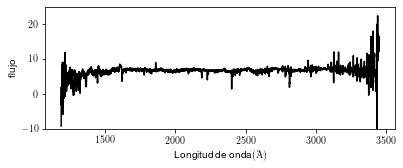

In [12]:
# Ejemplo de espectro de QSO- generado
espectro_generado = generarEspectro(objetos["QSO-"]["kdes"])
construir_espectro(espectro_generado,objetos["QSO-"],z=2) 

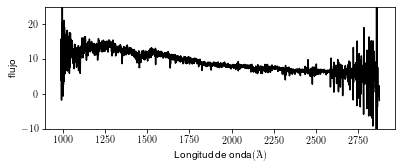

In [15]:
# Ejemplo de espectro de QSO+ generado
espectro_generado = generarEspectro(objetos["QSO+"]["kdes"])
construir_espectro(espectro_generado,objetos["QSO+"],z=2.6)

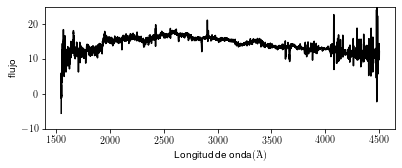

In [14]:
# Ejemplo de generación de 10 espectros QSO-
espectros = generarEspectro(objetos["QSO-"]["kdes"],10)

#Graficamos el 1ro
construir_espectro(espectros[0],objetos["QSO-"],z=1.3)
